In [1]:
from unidec_modules.v3_SeqChrom import * # MAKE SURE LATEST MATPLOTLIB INSTALLED!
# import matplotlib.cm as cm

Could not import data reader: unidectools


In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:

spectra = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\20230710 4C_24h_1.mzML"
# plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ sortase time course 1.5 eq gvseyg.xlsx"

In [4]:
eng.load_mzml(spectra, clear_hdf5=True)

Reading mzML: D:\WORK\20230710 DOE_CTB H6_5M_DAmp\24h\20230710 4C_24h_1.mzML
found chromatogram
found chromatogram
Converted to gzip file to improve speed: D:\WORK\20230710 DOE_CTB H6_5M_DAmp\24h\20230710 4C_24h_1.mzML.gz


False

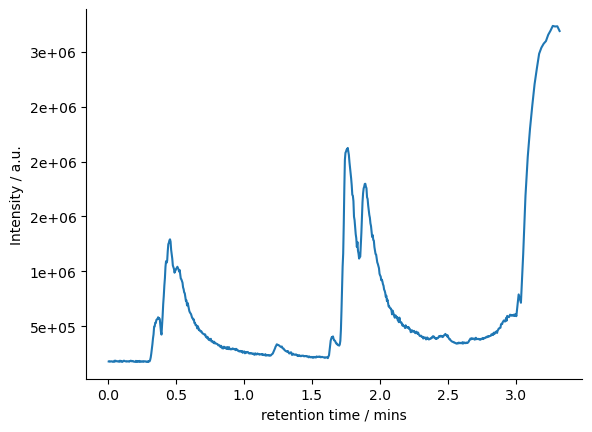

In [5]:
# eng.config.chrom_peak_width = 0.6
# eng.get_chrom_peaks(lb = 1, ub = 5.5) 
# eng.add_chrom_peaks2() 

if eng.ticdat[:, 0].max() > 100: 
    eng.ticdat[:, 0] = eng.tic[:, 0] = eng.ticdat[:, 0]/60 # add in check in code
    
eng.plot_tic(peak_windows = False)

In [6]:
t = 1.7,1.9

data = eng.get_data_from_times(t[0], t[1])
eng.data.add_data(data, name = str(t[0]))
# plt.plot(eng.data.data2[:,0], eng.data.data2[:,1])

Scan Range: [406, 453]


n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 1.107791700000007
Execution Time: 12.272285999999951


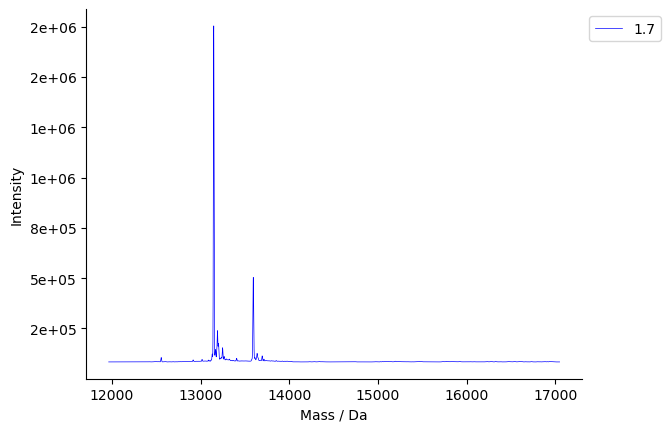

In [7]:
eng.update_config(masslb = 12000, massub = 17000, minmz="750",maxmz="",
        
        mzbins = 0,
        linflag = 0,
        adductmass = 1.007276467,
        
        startz = 1,
        endz = 100,

        
        massbins = 0.1,
        mzsig = 1,
        psfun = 0,
        isotopemode = 1,
        molig = 0,
        msig = 1,
        numit = 100,
        zzsig = 1,
        psig = 1,
        poolflag = 2,)

# UniDec
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 0
eng.config.startz = 1
eng.config.endz = 50
eng.config.numz = 50
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 17000
eng.config.masslb = 12000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12


eng.process_data()
eng.run_unidec()
eng.plot_all(dtype = 'massdat', combine = True, cmap = 'brg', show_ints=False)
# eng.pick_peaks()
# eng.integrate_all()

In [ ]:
d = np.transpose(((eng.data.spectra[0].massdat[:,1]),eng.data.spectra[0].massdat[:,0]))
np.savetxt("20230710 4C_24h_1_unidec.txt",d,delimiter=',',header="unidec_export")

In [ ]:
eng.data.spectra[0].massdat

In [ ]:
eng.plot_all(dtype = 'massdat', combine = True, cmap = 'brg', show_ints=False)

In [ ]:
eng.plot_all(dtype = 'massdat', combine = True, cmap = 'brg', xlim = [14000, 17000])

In [ ]:
eng.upload_map(plate_map)

In [ ]:
eng.pmap

In [ ]:
eng.speciesmap

In [ ]:
eng.process_maps(groupby = 'Reaction', variable = 'Species')

In [ ]:
eng.pmap2

invalidate data using eng.invalidate()

In [ ]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Time')
# eng.invalidate("30")

eng.plot_data(cmap = 'Paired')

In [ ]:
dir(eng)

In [ ]:
eng.speciesmap

In [ ]:
eng.pmap3

In [ ]:
eng.pmap3.PanZ.iloc[2]